#Fases 3 y 4. Preparación y modelación de los datos
Avril Michelle Ruiz Martínez 

A00833018


In [ ]:
import pandas as pd # importa la librería pandas y la asigna a la variable pd

In [ ]:
datos_consumo = pd.read_excel('alimentos.xlsx') # indicamos el nombre de nuestro archivo a ser leído

In [ ]:
datos_consumo.head()

,Fecha (dd/mm/aa),Momento,Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,2022-01-05,Comida,Huevo Revuelto,199.0,1.96,15.210,13.010,211.00
1,2022-01-05,Comida,Jamón de Pavo,36.0,0.58,1.370,4.960,316.00
2,2022-01-05,Comida,Tostadas,164.0,33.20,1.600,4.000,164.00
3,2022-01-05,Snack,Barra Multigrano Nuez,172.0,19.55,9.214,2.652,59.84
4,2022-01-05,Snack,Chocolate Kisses,200.0,25.00,12.000,3.000,35.00


In [ ]:
""" con la función groupby agrupamos los datos de la 
 columna Momento y con count() los contamos para obtener subtotales """
datos_consumo.groupby("Momento").count()   

,Fecha (dd/mm/aa),Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
Momento,,,,,,,
Cena,29,29,29,29,29,29,29
Comida,47,47,47,47,47,47,47
Desayuno,53,53,53,53,53,53,53
Snack,41,41,41,41,41,41,41


In [ ]:
datos_consumo.describe()

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,192.347647,22.041253,7.976300,8.282588,275.267529
std,153.011102,18.096586,8.520209,12.462810,356.585914
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,85.250000,5.600000,1.600000,1.950000,52.000000
50%,157.000000,18.345000,4.600000,3.370000,150.000000
75%,241.000000,31.730000,12.000000,9.892500,357.150000
max,1082.000000,78.135000,50.000000,96.000000,1756.000000


##Seleccionando los datos



In [ ]:
datos_seleccionados = datos_consumo.iloc[:,3:8] # : selecciona todas las filas y las columnas de la 3 a la 7 (empiezan en 0)
datos_seleccionados # desplegamos el dataframe

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,199.0,1.960,15.210,13.010,211.00
1,36.0,0.580,1.370,4.960,316.00
2,164.0,33.200,1.600,4.000,164.00
3,172.0,19.550,9.214,2.652,59.84
4,200.0,25.000,12.000,3.000,35.00
...,...,...,...,...,...
165,420.0,29.250,16.975,37.550,1282.50
166,112.0,23.280,1.230,1.950,118.00
167,150.0,14.000,9.500,2.000,336.60
168,61.0,5.600,3.000,3.000,52.00


In [ ]:
datos_seleccionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calorías (kcal)     170 non-null    float64
 1   Carbohidratos (g)   170 non-null    float64
 2   Lípidos/grasas (g)  170 non-null    float64
 3   Proteína (g)        170 non-null    float64
 4   Sodio (mg)          170 non-null    float64
dtypes: float64(5)
memory usage: 6.8 KB


##Limpiando los datos

In [ ]:
datos_seleccionados.isnull()   # si es un valor faltante o nulo regresa True

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
165,False,False,False,False,False
166,False,False,False,False,False
167,False,False,False,False,False
168,False,False,False,False,False


In [ ]:
datos_seleccionados.isnull().values.any()   # regresa False si no hay ningún elemento nulo en el dataframe

False

In [ ]:
dataset = datos_seleccionados.dropna()    # creamos un nuevo dataframe descartando los valores nulos o vacíos 
dataset

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,199.0,1.960,15.210,13.010,211.00
1,36.0,0.580,1.370,4.960,316.00
2,164.0,33.200,1.600,4.000,164.00
3,172.0,19.550,9.214,2.652,59.84
4,200.0,25.000,12.000,3.000,35.00
...,...,...,...,...,...
165,420.0,29.250,16.975,37.550,1282.50
166,112.0,23.280,1.230,1.950,118.00
167,150.0,14.000,9.500,2.000,336.60
168,61.0,5.600,3.000,3.000,52.00


In [ ]:
dataset.isnull().sum() # validamos que no tenemos valores nulos en ninguna columna, todos deben dar cero

Calorías (kcal)       0
Carbohidratos (g)     0
Lípidos/grasas (g)    0
Proteína (g)          0
Sodio (mg)            0
dtype: int64

##Preparando los datos

In [ ]:
dataset.columns # vemos los nombres de nuestras columnas para asignarlos a las variables

Index(['Calorías (kcal)', 'Carbohidratos (g)', 'Lípidos/grasas (g)',
       'Proteína (g)', 'Sodio (mg)'],
      dtype='object')

In [ ]:
x = dataset[['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']].values # variables independientes

In [ ]:
y = dataset['Calorías (kcal)'].values # variable dependiente

In [ ]:
from sklearn.model_selection import train_test_split # importamos la herramienta para dividir los datos de SciKit-Learn

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # asignación de los datos 80% para entrenamiento y 20% para prueba, sin aplicar un shuffle antes de dividir los datos

##Modelación de los datos

In [ ]:
from sklearn.linear_model import LinearRegression # importamos la clase de regresión lineal

modelo_regresion = LinearRegression() # modelo de regresión será el objeto de la clase

In [ ]:
modelo_regresion.fit(x_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression()

In [ ]:
x_columns = ['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']
coeff_df = pd.DataFrame(modelo_regresion.coef_, x_columns, columns=['Coeficientes'])
coeff_df # despliega los coefientes y sus valores; por cada unidad del coeficente, su impacto en las calorías será igual a su valor

,Coeficientes
Carbohidratos (g),4.000183
Lípidos/grasas (g),8.827369
Proteína (g),4.154251
Sodio (mg),0.003553


In [ ]:
y_pred = modelo_regresion.predict(x_test) # probamos nuestro modelo con los valores de prueba

In [ ]:
validacion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred, 'Diferencia': y_test-y_pred })
 # creamos un dataframe con los valores actuales y los de predicción

In [ ]:
muestra_validacion = validacion.head(25) # elegimos una muestra con 25 valores 

muestra_validacion # desplegamos esos 25 valores 

,Actual,Predicción,Diferencia
0,180.0,178.312234,1.687766
1,60.0,71.106709,-11.106709
2,61.0,59.834634,1.165366
3,74.0,71.472665,2.527335
4,426.0,423.206354,2.793646
5,360.0,360.487082,-0.487082
6,141.0,140.688864,0.311136
7,75.6,74.082720,1.517280
8,241.0,243.111398,-2.111398
9,41.0,39.001784,1.998216


In [ ]:
validacion["Diferencia"].describe()   # obtenemos la estadística descriptiva de la columna Diferencia:

count    34.000000
mean      0.394490
std      11.500332
min     -21.799516
25%      -2.227969
50%       1.020537
75%       1.657436
max      55.054017
Name: Diferencia, dtype: float64

In [ ]:
from sklearn.metrics import r2_score # importamos la importamos la métrica R cuadrada (coeficiente de determinación)

r2_score(y_test, y_pred) # indicamos nuestros valores reales y calculados

0.9924323239550722

##Visualización de los datos

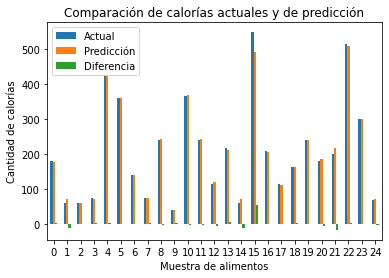

In [ ]:
import matplotlib.pyplot as plt # importamos la librería que nos permitirá graficar

muestra_validacion.plot.bar(rot=0)  # creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción

plt.title("Comparación de calorías actuales y de predicción") # indicamos el título del gráfico

plt.xlabel("Muestra de alimentos") # indicamos la etiqueta del eje de las x, los alimentos

plt.ylabel("Cantidad de calorías") # indicamos la etiqueta del eje de las y, la cantidad de calorías

plt.show() # desplegamos el gráfico

#El efecto del consumo calórico en el tiempo

In [ ]:
import pandas as pd  # importa la librería pandas y la asigna a la variable pd

In [ ]:
datos_consumo = pd.read_excel('alimentos.xlsx')  # indicamos el nombre de nuestro archivo a ser leído

In [ ]:
datos_consumo.head()

,Fecha (dd/mm/aa),Momento,Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,2022-01-05,Comida,Huevo Revuelto,199.0,1.96,15.210,13.010,211.00
1,2022-01-05,Comida,Jamón de Pavo,36.0,0.58,1.370,4.960,316.00
2,2022-01-05,Comida,Tostadas,164.0,33.20,1.600,4.000,164.00
3,2022-01-05,Snack,Barra Multigrano Nuez,172.0,19.55,9.214,2.652,59.84
4,2022-01-05,Snack,Chocolate Kisses,200.0,25.00,12.000,3.000,35.00


In [ ]:
datos = datos_consumo[["Fecha (dd/mm/aa)","Calorías (kcal)"]]  # seleccionamos las dos columnas que necesitaremos

In [ ]:
datos.head()  # imprimiendo los datos selecccionados

,Fecha (dd/mm/aa),Calorías (kcal)
0,2022-01-05,199.0
1,2022-01-05,36.0
2,2022-01-05,164.0
3,2022-01-05,172.0
4,2022-01-05,200.0


In [ ]:
suma_calorias = datos["Calorías (kcal)"].sum()
suma_calorias  # despliega el total de calorias

32699.1

In [ ]:
# Contaremos el total de días diferentes con la función nunique():
dias = datos["Fecha (dd/mm/aa)"].nunique()
dias

24

In [ ]:
calorias_promedio = suma_calorias / dias  # total de calorías consumidas entre el número de días que tomó consumirlas
print("Tu promedio de calorías consumidas en", dias,"días es:", calorias_promedio.round(2))

Tu promedio de calorías consumidas en 24 días es: 1362.46


In [ ]:
peso = int(input("Ingresa tu peso en kilogramos: "))

altura = int(input("Ingresa tu altura en centimetros: "))

edad = int(input("Ingresa tu edad en años: "))

genero = input("Ingresa tu género, Mujer/Hombre: ")

Ingresa tu peso en kilogramos: 55
Ingresa tu altura en centimetros: 163
Ingresa tu edad en años: 16
Ingresa tu género, Mujer/Hombre: Mujer


In [ ]:
if(genero == "Mujer"):
   calorias_requeridas = 655+(9.56*peso)+(1.85*altura)-(4.68*edad) # fórmula para estimar calorías requeridas en mujer

elif(genero == "Hombre"):
  calorias_requeridas = 66.5+(13.75*peso)+(5*altura)-(6.8*edad) # fórmula para estimar calorías requeridas en hombre

print("Con base en tus datos, tu consumo de calorías al día debe ser de:", calorias_requeridas)

Con base en tus datos, tu consumo de calorías al día debe ser de: 1407.4700000000003


In [ ]:
diferencia = calorias_promedio - calorias_requeridas

diferencia

-45.00750000000039

In [ ]:
efecto_anual = diferencia * 450/3500 * 365 /1000 # realiza la proporción, se multiplica por 365 (días) y se divide entre 1000 (gramos) para obtener kilogramos

print("Si continuas con el consumo calórico actual, en un año tu cambio de masa corporal sería aproximadamente de:",efecto_anual,"kg")

Si continuas con el consumo calórico actual, en un año tu cambio de masa corporal sería aproximadamente de: -2.1121376785714463 kg
